
# Weird Motors Pricing Calculator

## Setup

In [2]:
#Python import Pandas to be the container of all data. Import Seaborn for graphical data analysis.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Set the theme for Seaborn graphics
sns.set_theme()

## Data Sampling

In [3]:
#Read in CSV file into cars DataFrame show the first 5 rows of cars to see what we are working with.
cars = pd.read_csv('CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Exploration & Visualizations

### -Numaric Type

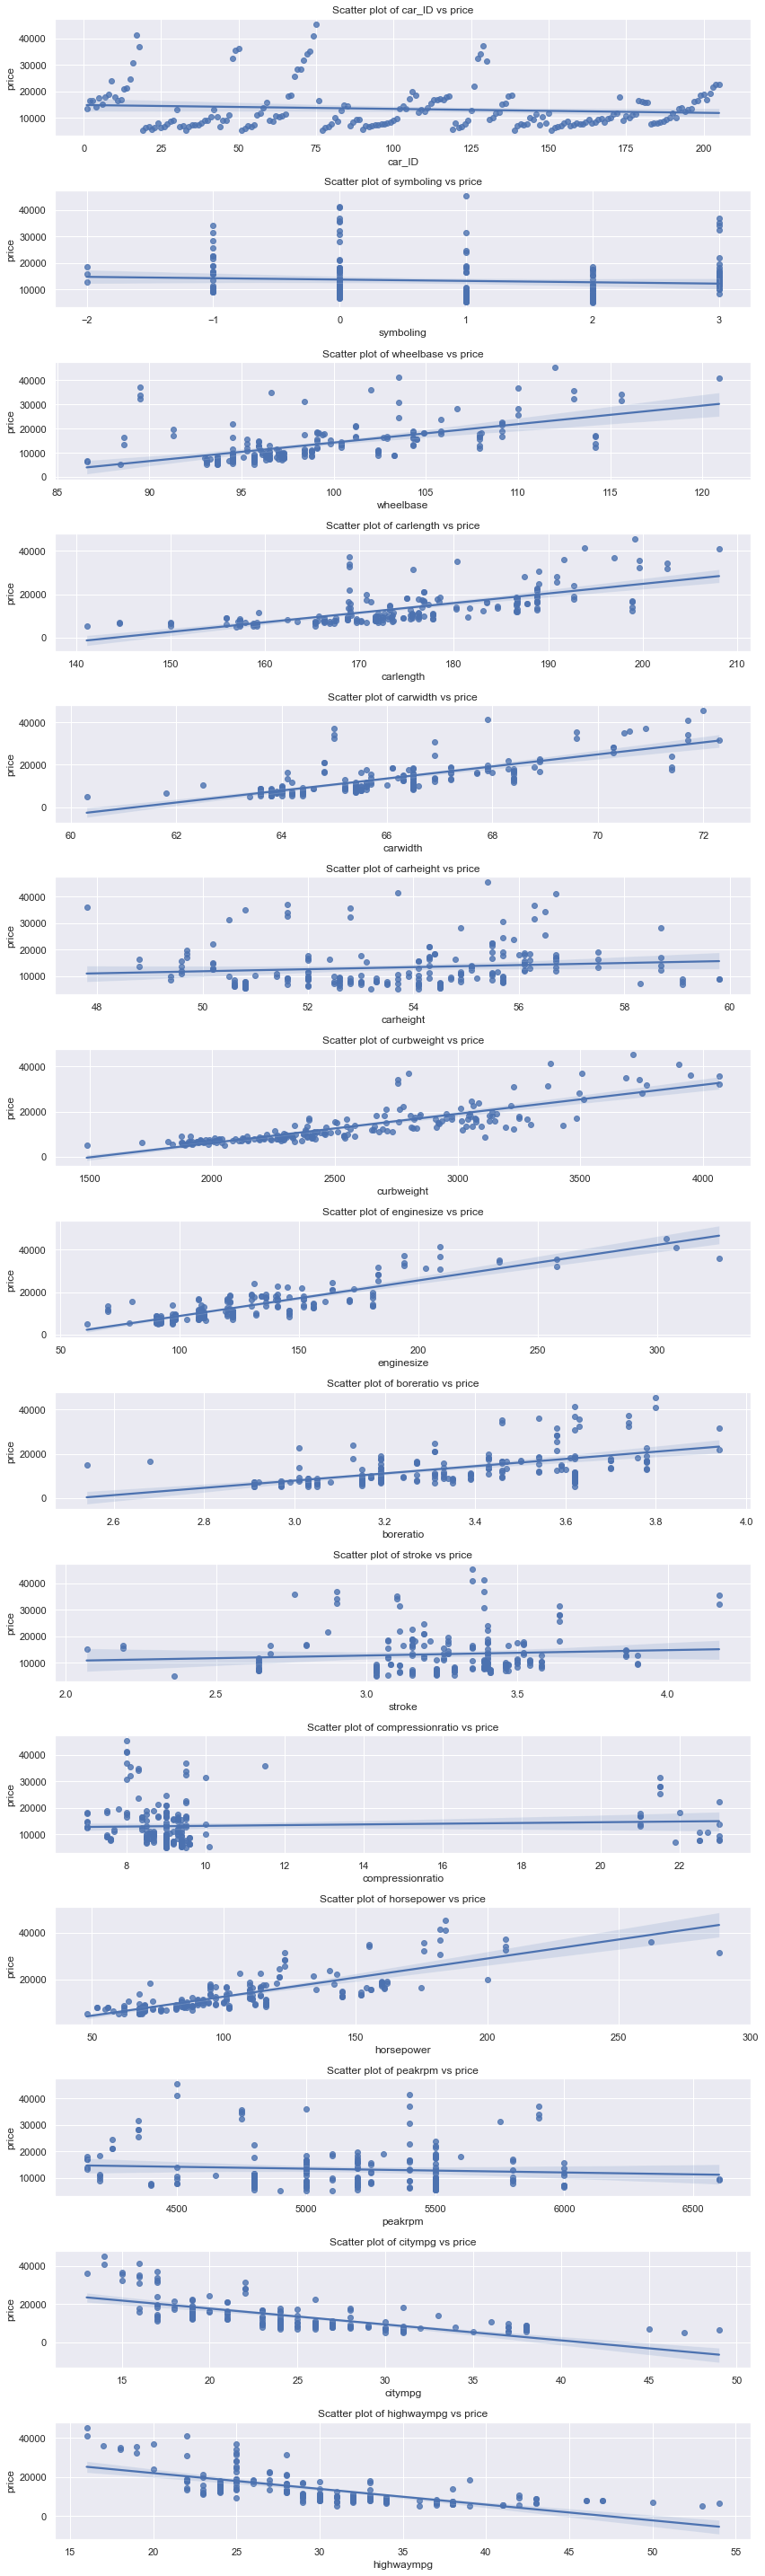

In [4]:
#Split the Features into strings and numbers and remove price
carFeatureListObj = list(cars.select_dtypes(include='object').columns)
carFeatureListNum = list(cars.select_dtypes(include='number').columns)
carFeatureListNum.remove('price')

#A for loop to create graphs based on the number type features
fig,ax=plt.subplots(nrows=len(carFeatureListNum),ncols=1,figsize=(12,40))
count=0
for i in carFeatureListNum:
    sns.regplot(x=cars[i],y=cars["price"],ax=ax[count])
    ax[count].set_title("Scatter plot of "+str(i)+" vs price")
    count+=1
plt.tight_layout()

### -String Type

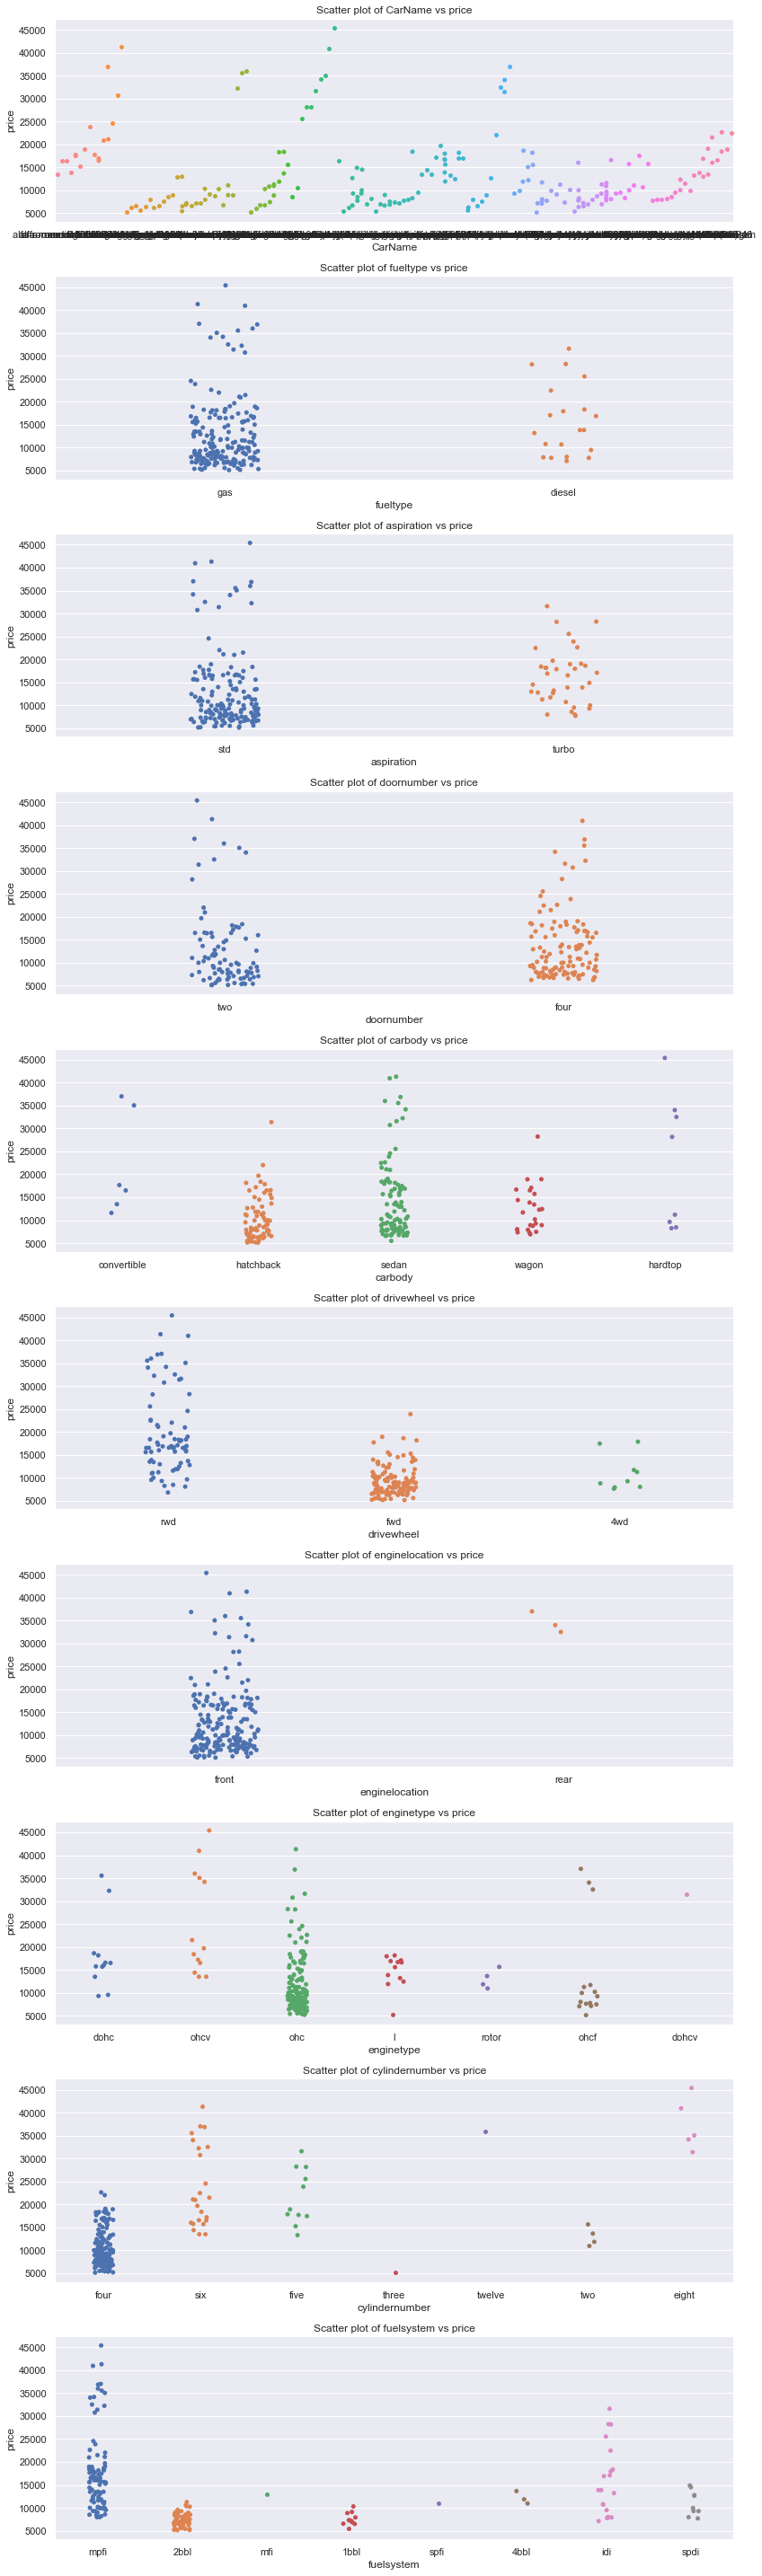

In [5]:
#A for loop to create graphs based on the string type features
fig,ax=plt.subplots(nrows=len(carFeatureListObj),ncols=1,figsize=(12,40))
count=0
for i in carFeatureListObj:
    sns.stripplot(x=cars[i],y=cars["price"],ax=ax[count])
    ax[count].set_title("Scatter plot of "+str(i)+" vs price")
    count+=1
plt.tight_layout()

### -Heatmap

<AxesSubplot:>

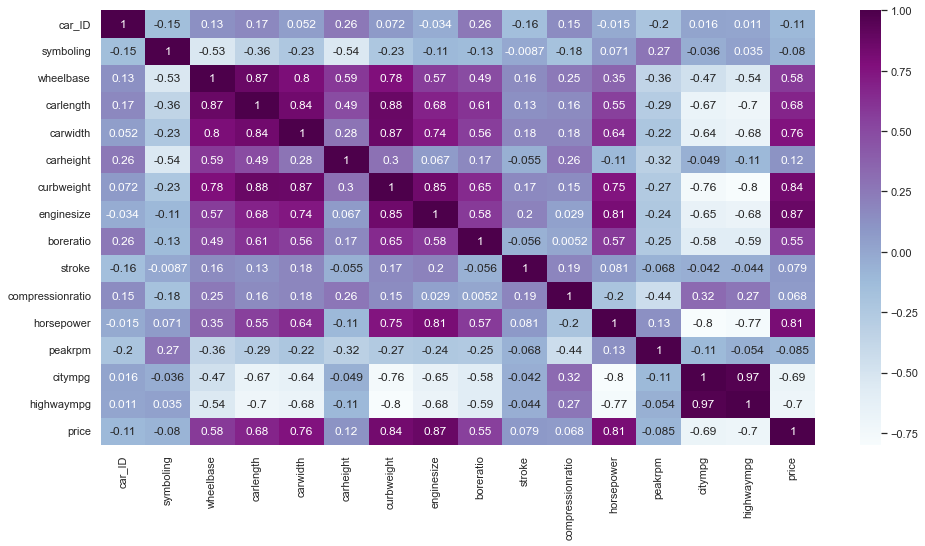

In [6]:
#Show a heatmap of the coorolation between all features including price
plt.figure(figsize=(16,8))
sns.heatmap(cars.corr(), annot=True, cmap='BuPu')

## Data Modification

In [7]:
#Remove Car_ID and check cars for any duplicate rows.
cars = cars.drop(['car_ID'], axis=1)
carFeatureListNum.remove('car_ID')
print ("Duplicate cars: " + str(cars.duplicated().sum()))

#Remove CarName and see list of features
cars = cars.drop(['CarName'], axis=1)
carFeatureListObj.remove('CarName')

cars.dtypes

Duplicate cars: 0


symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
#Transform all of the string feature columns into seperate columns based on strings
carsDummied = pd.get_dummies(cars, columns=carFeatureListObj, drop_first=True)
carsDummied.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


## Model Creation

In [9]:
#Import train_test_split to create testing data and training data
from sklearn.model_selection import train_test_split
#Import the linear regression model api
from sklearn.linear_model import LinearRegression

#split data into independant and depaendant variables.
X = carsDummied.drop('price', axis=1)
Y = carsDummied['price']

#Create training/testing data and show the sizes of the split data
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.05, random_state = 42)

#Create a linear regression model and see the score (0-1) 1 being the best
lr = LinearRegression()
lr.fit(xTrain, yTrain)

LinearRegression()

## Model Assessment

In [10]:
#R^2 score of the model between 0 and 1 (Higher is better)
lr.score(xTest, yTest)

0.9324170824278943

In [11]:
#Use the model to predict the 11 test data entries to see how well it did.
yPredicted = lr.predict(xTest)
d = {'Predicted':list(yPredicted), 'Actual':list(yTest)}
df = pd.DataFrame(data=d)
df["Percentage"] = abs(df['Predicted']-df['Actual'])/df['Actual']*100
df

,Predicted,Actual,Percentage
0,30835.222774,30760.000,0.244547
1,21811.614932,17859.167,22.131200
2,11040.826615,9549.000,15.622857
3,12774.178058,11850.000,7.798971
4,27055.455819,28248.000,4.221694
5,5773.188706,7799.000,25.975270
6,8862.450134,7788.000,13.796227
7,7709.854333,9258.000,16.722247
8,9105.738035,10198.000,10.710551
9,9729.162211,7775.000,25.133919


# User GUI

In [12]:
#Import ipywidgets to create a gui with widgets
from ipywidgets import widgets
from IPython.display import clear_output

#Each car feature will need its own widget

symboling = widgets.RadioButtons(
    options=['-2', '-1', '0', '1', '2', '3'],
    description='Symboling:',
    disabled=False
)
display(symboling)

fueltype = widgets.RadioButtons(
    options=cars["fueltype"].unique(),
    description='Fuel Type:',
    disabled=False
)
display(fueltype)

aspiration = widgets.RadioButtons(
    options=cars["aspiration"].unique(),
    description='Aspiration:',
    disabled=False
)
display(aspiration)

doornumber = widgets.RadioButtons(
    options=cars["doornumber"].unique(),
    description='Doornumber:',
    disabled=False
)
display(doornumber)

carbody = widgets.RadioButtons(
    options=cars["carbody"].unique(),
    description='Car body:',
    disabled=False
)
display(carbody)

drivewheel = widgets.RadioButtons(
    options=cars["drivewheel"].unique(),
    description='Drive wheel:',
    disabled=False
)
display(drivewheel)

enginelocation = widgets.RadioButtons(
    options=cars["enginelocation"].unique(),
    description='Engine location:',
    disabled=False,
    layout={'width': 'max-content'}
)
display(enginelocation)

wheelbase = widgets.FloatSlider(
    value=cars['wheelbase'].min(),
    min=cars['wheelbase'].min(),
    max=cars['wheelbase'].max(),
    step=0.1,
    description='Wheelbase:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(wheelbase)

carlength = widgets.FloatSlider(
    value=cars['carlength'].min(),
    min=cars['carlength'].min(),
    max=cars['carlength'].max(),
    step=0.1,
    description='Car length:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(carlength)

carwidth = widgets.FloatSlider(
    value=cars['carwidth'].min(),
    min=cars['carwidth'].min(),
    max=cars['carwidth'].max(),
    step=0.1,
    description='Car Width:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(carwidth)

carheight = widgets.FloatSlider(
    value=cars['carheight'].min(),
    min=cars['carheight'].min(),
    max=cars['carheight'].max(),
    step=0.1,
    description='Car Height:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(carheight)

curbweight = widgets.IntSlider(
    value=cars['curbweight'].min(),
    min=cars['curbweight'].min(),
    max=cars['curbweight'].max(),
    step=1,
    description='Curb Weight:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(curbweight)

enginetype = widgets.RadioButtons(
    options=cars["enginetype"].unique(),
    description='Engine type:',
    disabled=False
)
display(enginetype)

cylindernumber = widgets.RadioButtons(
    options=cars["cylindernumber"].unique(),
    description='Cylinder number:',
    disabled=False
)
display(cylindernumber)

enginesize = widgets.IntSlider(
    value=cars['enginesize'].min(),
    min=cars['enginesize'].min(),
    max=cars['enginesize'].max(),
    step=1,
    description='Engine size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(enginesize)

fuelsystem = widgets.RadioButtons(
    options=cars["fuelsystem"].unique(),
    description='Fuel system:',
    disabled=False
)
display(fuelsystem)

boreratio = widgets.FloatSlider(
    value=cars['boreratio'].min(),
    min=cars['boreratio'].min(),
    max=cars['boreratio'].max(),
    step=0.1,
    description='Bore ratio:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(boreratio)

stroke = widgets.FloatSlider(
    value=cars['stroke'].min(),
    min=cars['stroke'].min(),
    max=cars['stroke'].max(),
    step=0.1,
    description='Stroke:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(stroke)

compressionratio = widgets.FloatSlider(
    value=cars['compressionratio'].min(),
    min=cars['compressionratio'].min(),
    max=cars['compressionratio'].max(),
    step=0.1,
    description='Compression ratio:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(compressionratio)

horsepower = widgets.IntSlider(
    value=cars['horsepower'].min(),
    min=cars['horsepower'].min(),
    max=cars['horsepower'].max(),
    step=1,
    description='Horse power:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(horsepower)

peakrpm = widgets.IntSlider(
    value=cars['peakrpm'].min(),
    min=cars['peakrpm'].min(),
    max=cars['peakrpm'].max(),
    step=1,
    description='Peak rpm:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(peakrpm)

citympg = widgets.IntSlider(
    value=cars['citympg'].min(),
    min=cars['citympg'].min(),
    max=cars['citympg'].max(),
    step=1,
    description='City mpg:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(citympg)

highwaympg = widgets.IntSlider(
    value=cars['highwaympg'].min(),
    min=cars['highwaympg'].min(),
    max=cars['highwaympg'].max(),
    step=1,
    description='Highway mpg:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(highwaympg)

#Quick check for dummy variables. If string is a match return 1.
def dummycheck(src, check):
    if src==check:
        return 1
    else:
        return 0

#When the submit button is pressed this function will be run to get the market value.
def SubmitForm(b):
    print("Generating Estimate...")
    d = {'symboling':symboling.value,
         'wheelbase':wheelbase.value,
         'carlength':carlength.value,
         'carwidth':carwidth.value,
         'carheight':carheight.value,
         'curbweight':curbweight.value,
         'enginesize':enginesize.value,
         'boreratio':boreratio.value,
         'stroke':stroke.value,
         'compressionratio':compressionratio.value,
         'horsepower':horsepower.value,
         'peakrpm':peakrpm.value,
         'citympg':citympg.value,
         'highwaympg':highwaympg.value,
         'fueltype_gas':dummycheck(fueltype.value, "gas"),
         'aspiration_turbo':dummycheck(aspiration.value, "turbo"),
         'doornumber_two':dummycheck(doornumber.value, "two"),
         'carbody_hardtop':dummycheck(carbody.value, "hardtop"),
         'carbody_hatchback':dummycheck(carbody.value, "hatchback"),
         'carbody_sedan':dummycheck(carbody.value, "sedan"),
         'carbody_wagon':dummycheck(carbody.value, "wagon"),
         'drivewheel_fwd':dummycheck(drivewheel.value, "fwd"),
         'drivewheel_rwd':dummycheck(drivewheel.value, "rwd"),
         'enginelocation_rear':dummycheck(enginelocation.value, "rear"),
         'enginetype_dohcv':dummycheck(enginetype.value, "dohcv"),
         'enginetype_l':dummycheck(enginetype.value, "l"),
         'enginetype_ohc':dummycheck(enginetype.value, "ohc"),
         'enginetype_ohcf':dummycheck(enginetype.value, "ohcf"),
         'enginetype_ohcv':dummycheck(enginetype.value, "ohcv"),
         'enginetype_rotor':dummycheck(enginetype.value, "rotor"),
         'cylindernumber_five':dummycheck(cylindernumber.value, "five"),
         'cylindernumber_four':dummycheck(cylindernumber.value, "four"),
         'cylindernumber_six':dummycheck(cylindernumber.value, "six"),
         'cylindernumber_three':dummycheck(cylindernumber.value, "three"),
         'cylindernumber_twelve':dummycheck(cylindernumber.value, "twelve"),
         'cylindernumber_two':dummycheck(cylindernumber.value, "two"),
         'fuelsystem_2bbl':dummycheck(fuelsystem.value, "2bbl"),
         'fuelsystem_4bbl':dummycheck(fuelsystem.value, "4bbl"),
         'fuelsystem_idi':dummycheck(fuelsystem.value, "idi"),
         'fuelsystem_mfi':dummycheck(fuelsystem.value, "mfi"),
         'fuelsystem_mpfi':dummycheck(fuelsystem.value, "mpfi"),
         'fuelsystem_spdi':dummycheck(fuelsystem.value, "spdi"),
         'fuelsystem_spfi':dummycheck(fuelsystem.value, "spfi")}
    custom = pd.DataFrame(data=d, index=[0])
    customPrice = lr.predict(custom)
    print("Car market value estimate: $" + str(round(customPrice.item(0))))

submitButton = widgets.Button(description="Submit")
submitButton.on_click(SubmitForm)
display(submitButton)

RadioButtons(description='Symboling:', options=('-2', '-1', '0', '1', '2', '3'), value='-2')

RadioButtons(description='Fuel Type:', options=('gas', 'diesel'), value='gas')

RadioButtons(description='Aspiration:', options=('std', 'turbo'), value='std')

RadioButtons(description='Doornumber:', options=('two', 'four'), value='two')

RadioButtons(description='Car body:', options=('convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'), value…

RadioButtons(description='Drive wheel:', options=('rwd', 'fwd', '4wd'), value='rwd')

RadioButtons(description='Engine location:', layout=Layout(width='max-content'), options=('front', 'rear'), va…

FloatSlider(value=86.6, continuous_update=False, description='Wheelbase:', max=120.9, min=86.6, readout_format…

FloatSlider(value=141.1, continuous_update=False, description='Car length:', max=208.1, min=141.1, readout_for…

FloatSlider(value=60.3, continuous_update=False, description='Car Width:', max=72.3, min=60.3, readout_format=…

FloatSlider(value=47.8, continuous_update=False, description='Car Height:', max=59.8, min=47.8, readout_format…

IntSlider(value=1488, continuous_update=False, description='Curb Weight:', max=4066, min=1488)

RadioButtons(description='Engine type:', options=('dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'), value…

RadioButtons(description='Cylinder number:', options=('four', 'six', 'five', 'three', 'twelve', 'two', 'eight'…

IntSlider(value=61, continuous_update=False, description='Engine size:', max=326, min=61)

RadioButtons(description='Fuel system:', options=('mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'…

FloatSlider(value=2.54, continuous_update=False, description='Bore ratio:', max=3.94, min=2.54, readout_format…

FloatSlider(value=2.07, continuous_update=False, description='Stroke:', max=4.17, min=2.07, readout_format='.1…

FloatSlider(value=7.0, continuous_update=False, description='Compression ratio:', max=23.0, min=7.0, readout_f…

IntSlider(value=48, continuous_update=False, description='Horse power:', max=288, min=48)

IntSlider(value=4150, continuous_update=False, description='Peak rpm:', max=6600, min=4150)

IntSlider(value=13, continuous_update=False, description='City mpg:', max=49, min=13)

IntSlider(value=16, continuous_update=False, description='Highway mpg:', max=54, min=16)

Button(description='Submit', style=ButtonStyle())